In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv('Automobile_data.csv')

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [7]:
missing_data.sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [9]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [10]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
df["normalized-losses"].isnull().sum()

0

In [11]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [12]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [13]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [14]:
df["num-of-doors"].isnull().sum()

0

In [15]:
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [16]:
df["price"].isnull().sum()

0

In [17]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [18]:
avg_bore = df["bore"].astype("float").mean(axis=0)
print("Average of bore :", avg_bore)

Average of bore : 3.330710659898477


In [19]:
df["bore"].replace(np.nan, avg_bore, inplace=True)
df["bore"].isnull().sum()

0

In [20]:
avg_stroke = df["stroke"].astype("float").mean(axis=0)
print("Average of stroke :", avg_stroke)

Average of stroke : 3.256903553299492


In [21]:
df["stroke"].replace(np.nan, avg_stroke, inplace=True)
df["stroke"].isnull().sum()

0

In [22]:
avg_horsepower = df["horsepower"].astype("float").mean(axis=0)
print("Average of horsepower :", avg_horsepower)

Average of horsepower : 103.39698492462311


In [23]:
df["horsepower"].replace(np.nan, avg_horsepower, inplace=True)
df["horsepower"].isnull().sum()

0

In [24]:
avg_peakrpm = df["peak-rpm"].astype("float").mean(axis=0)
print("Average of peak-rpm :", avg_peakrpm)

Average of peak-rpm : 5117.587939698493


In [25]:
df["peak-rpm"].replace(np.nan, avg_peakrpm, inplace=True)
df["peak-rpm"].isnull().sum()

0

In [26]:
df.corr()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
symboling,1.000000,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.182196,-0.035527,0.036233
wheel-base,-0.535987,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.250313,-0.470606,-0.543304
length,-0.365404,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.159733,-0.665192,-0.698142
width,-0.242423,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.189867,-0.633531,-0.680635
height,-0.550160,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.259737,-0.049800,-0.104812
curb-weight,-0.233118,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.156433,-0.749543,-0.794889
engine-size,-0.110581,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.028889,-0.650546,-0.679571
compression-ratio,-0.182196,0.250313,0.159733,0.189867,0.259737,0.156433,0.028889,1.000000,0.331425,0.268465
city-mpg,-0.035527,-0.470606,-0.665192,-0.633531,-0.049800,-0.749543,-0.650546,0.331425,1.000000,0.972044
highway-mpg,0.036233,-0.543304,-0.698142,-0.680635,-0.104812,-0.794889,-0.679571,0.268465,0.972044,1.000000


In [27]:
df.describe(include=['object'])

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
count,201.0,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201
unique,52.0,22,2,2,2,5,3,2,6,7,8,39,37,59,23,186
top,122.0,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.4,68,4800,7609
freq,37.0,32,181,165,115,94,118,198,145,157,92,23,19,19,36,2


In [35]:
df["normalized-losses"] = df["normalized-losses"].astype("int64")

df["bore"] = df["bore"].astype("float")

df["stroke"] = df["stroke"].astype("float")

df["horsepower"] = df["horsepower"].astype("float")

df["peak-rpm"] = df["peak-rpm"].astype("float")

df["price"] = df["price"].astype("int64")

dtype('int64')

In [37]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

<AxesSubplot:xlabel='engine-size', ylabel='price'>

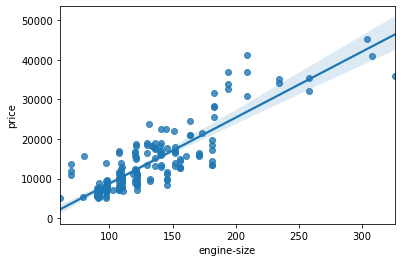

In [40]:
sns.regplot(x="engine-size", y="price", data=df)

<AxesSubplot:xlabel='horsepower', ylabel='price'>

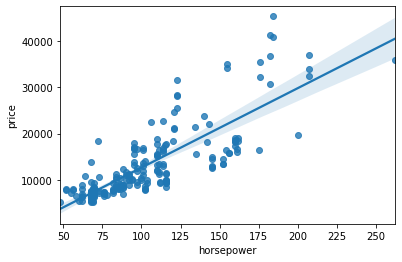

In [38]:
sns.regplot(x="horsepower", y="price", data=df)

<AxesSubplot:xlabel='curb-weight', ylabel='price'>

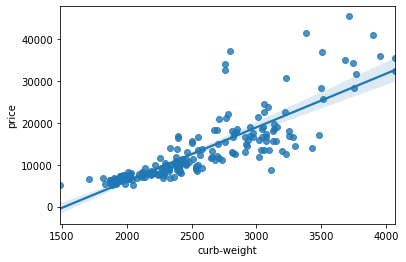

In [41]:
sns.regplot(x="curb-weight", y="price", data=df)

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

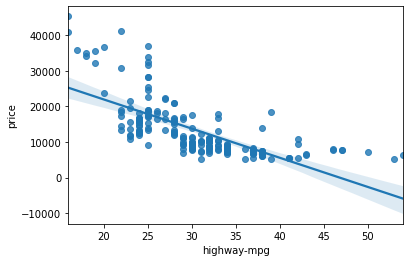

In [42]:
sns.regplot(x="highway-mpg", y="price", data=df)

In [43]:
X = df.drop(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration','num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
'engine-type','num-of-cylinders',  'fuel-system', 'bore', 'stroke','compression-ratio','horsepower', 'peak-rpm', 'price'], axis=1).values
y = df["price"].values.reshape(-1,1)
X_scale = scale(X)
y_scale = scale(y)
print(X.shape, y.shape)

(201, 8) (201, 1)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
print(X_train.shape, X_test.shape)

(140, 8) (61, 8)


In [47]:
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.7562096161149146